# Data Preparation for Model

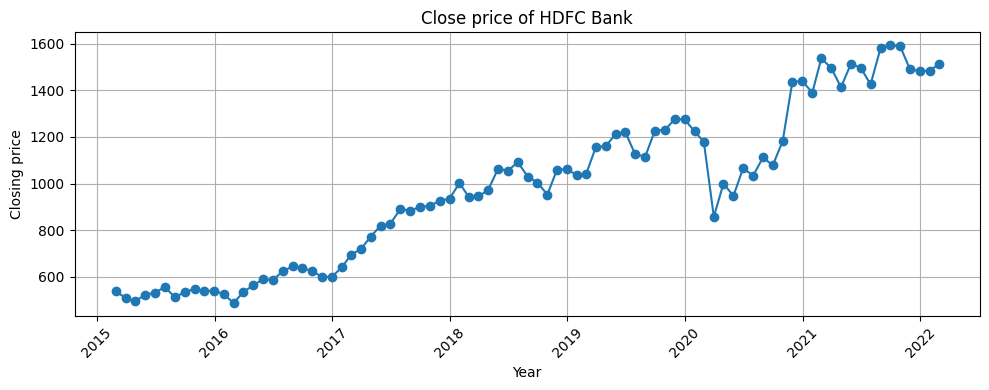

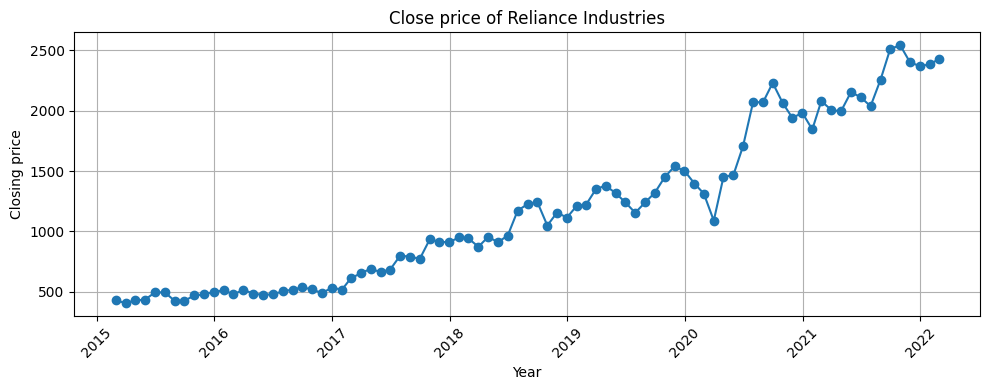

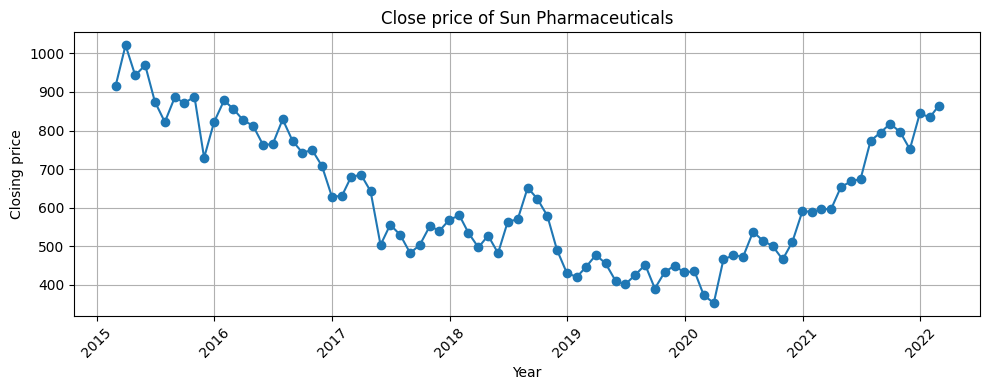

In [ ]:
# # Create a line plot to visualize the time series of monthly crime counts
plt.figure(figsize=(10, 4))
plt.plot(monthly_hdfc_data.index, monthly_hdfc_data.close, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.title('Close price of HDFC Bank')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(monthly_reliance_data.index, monthly_reliance_data.close, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.title('Close price of Reliance Industries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(monthly_sunpharma_data.index, monthly_sunpharma_data.close, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.title('Close price of Sun Pharmaceuticals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Seasonal decompose

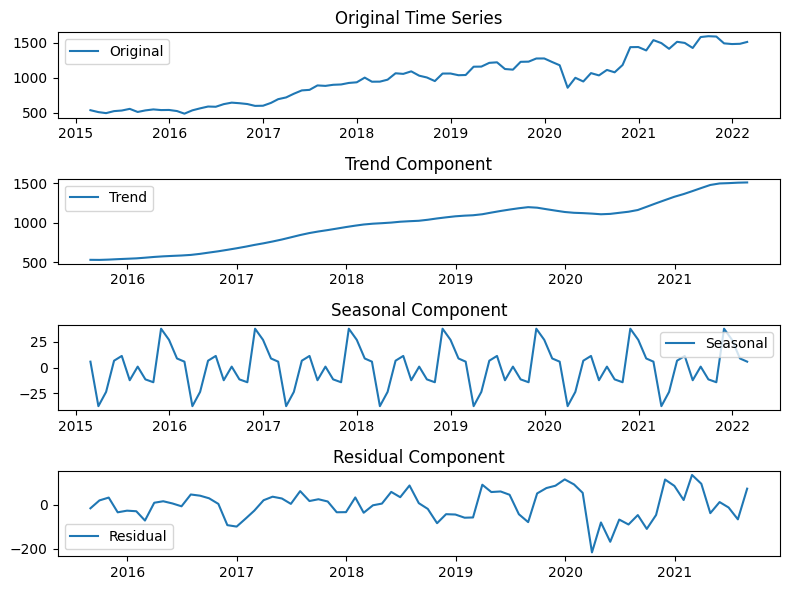

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_hdfc_data.close, model='additive', period=12)  # Assuming monthly data (period=12)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.plot(monthly_hdfc_data.close, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

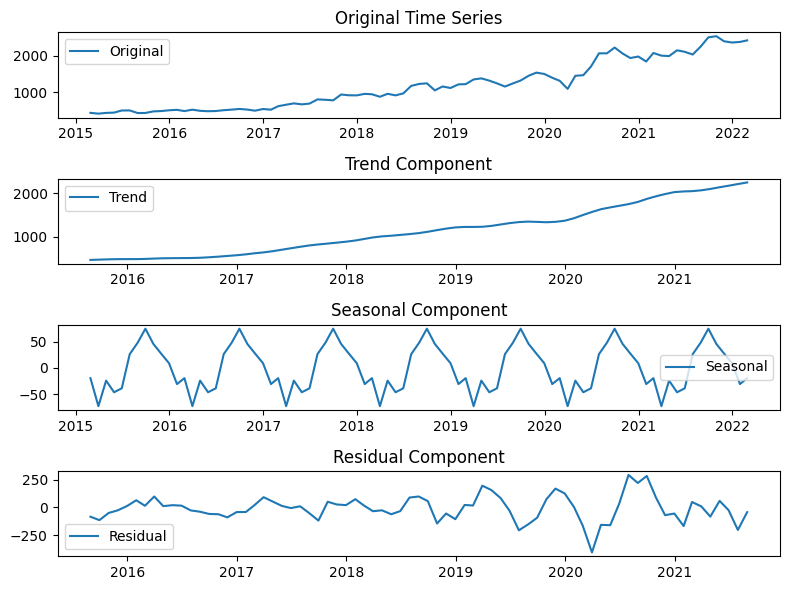

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_reliance_data.close, model='additive', period=12)  # Assuming monthly data (period=12)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.plot(monthly_reliance_data.close, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

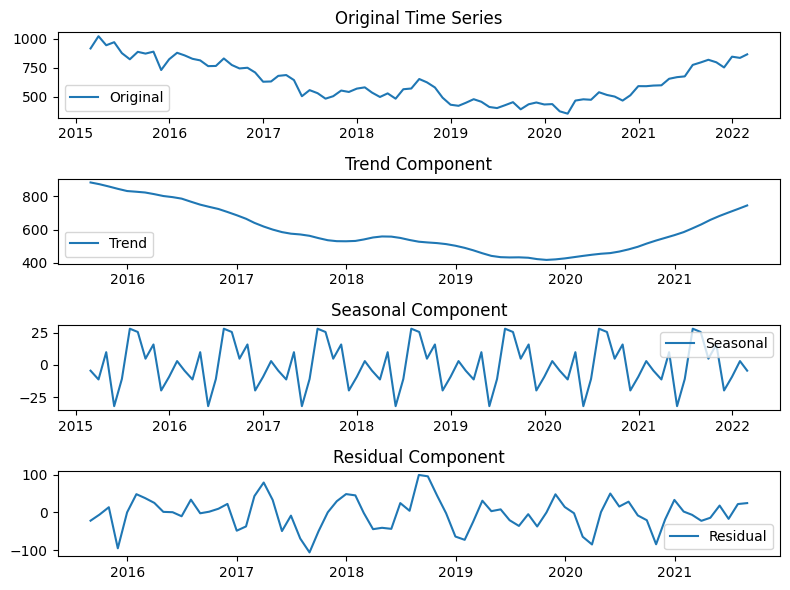

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sunpharma_data.close, model='additive', period=12)  # Assuming monthly data (period=12)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.plot(monthly_sunpharma_data.close, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ADF Statistic: -0.7637585246118636
p-value: 0.829536673015194
Critical Values:
   1%: -3.510711795769895
   5%: -2.8966159448223734
   10%: -2.5854823866213152


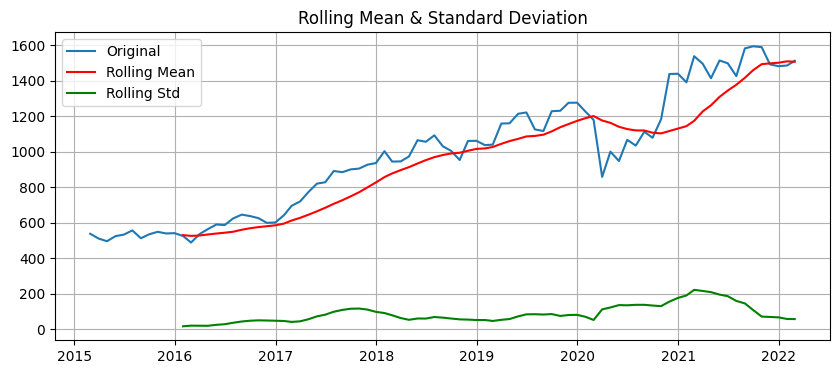

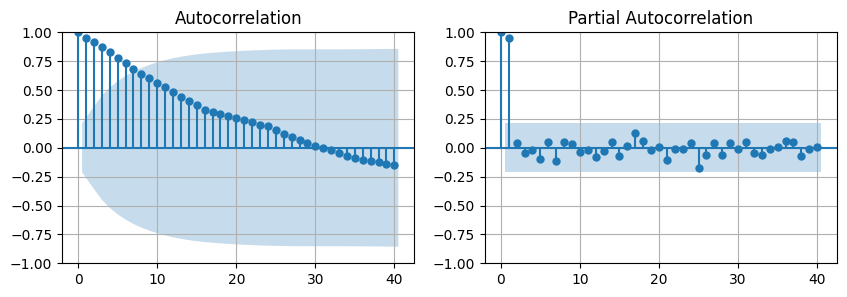

In [ ]:
def test_stationarity(time_series):
    # Calculate rolling statistics
    rolling_mean = time_series.rolling(window=12).mean()
    rolling_std = time_series.rolling(window=12).std()

    # Perform ADF test
    adf_test = adfuller(time_series, autolag='AIC')

    # Plot rolling statistics
    plt.figure(figsize=(10, 4))
    plt.plot(time_series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid(True)

    # Print ADF test results
    print('ADF Statistic:', adf_test[0])
    print('p-value:', adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'   {key}: {value}')

    # Plot ACF and PACF
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    plot_acf(time_series, lags=40, ax=ax1)
    ax1.grid(True)
    plot_pacf(time_series, lags=40, ax=ax2)
    ax2.grid(True)
    plt.show()

(# Assuming 'monthly_hdfc_data' is your time series DataFrame
test_stationarity(monthly_hdfc_data.close))

In [ ]:
 monthly_hdfc_data['first_difference'] = monthly_hdfc_data['close'].diff()
 monthly_reliance_data['first_difference'] = monthly_reliance_data['close'].diff()
 monthly_sunpharma_data['first_difference'] = monthly_sunpharma_data['close'].diff()
 monthly_hdfc_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'sma5', 'sma10', 'sma15',
       'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'upperband', 'middleband',
       'lowerband', 'macd510', 'macd520', 'macd1020', 'macd1520', 'macd1226',
       'RSI14', 'RSI8', 'year', 'month', 'first_difference'],
      dtype='object')

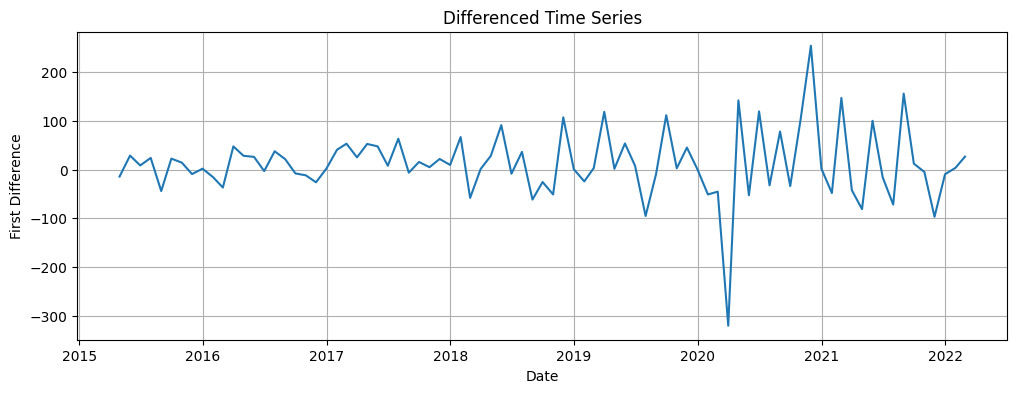

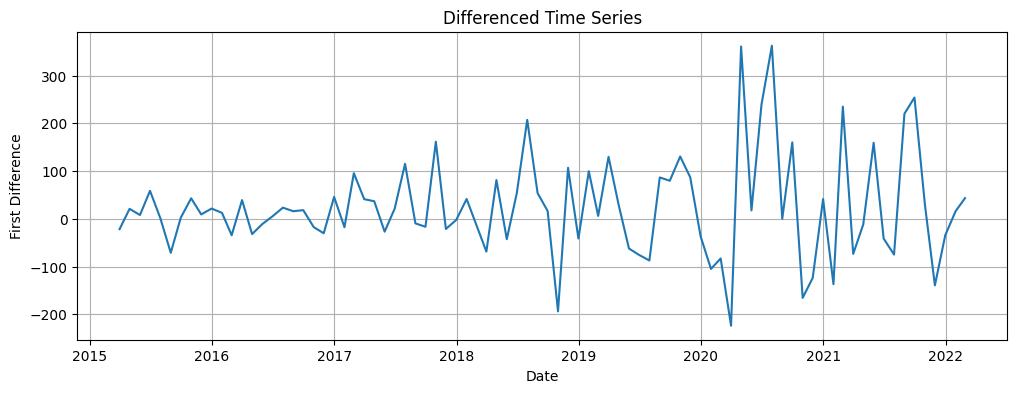

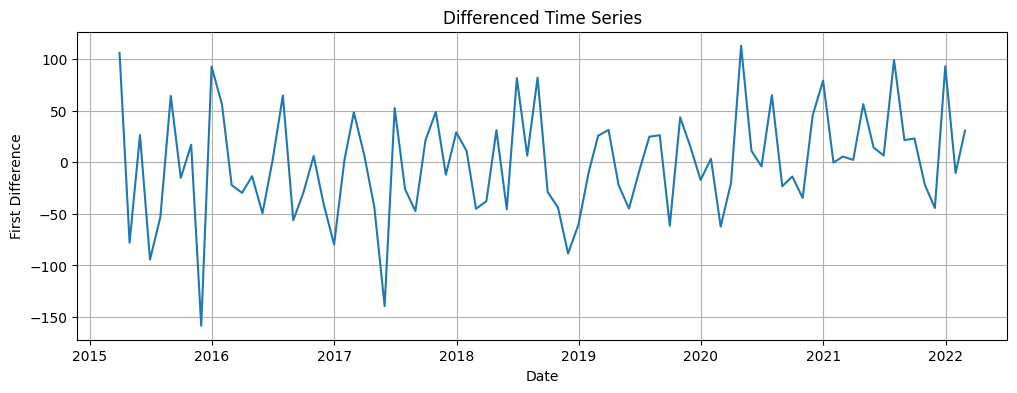

In [ ]:
# visualize the differenced data to check for stationarity visually
plt.figure(figsize=(12, 4))
plt.plot(monthly_hdfc_data.index, monthly_hdfc_data['first_difference'])
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.title('Differenced Time Series')
plt.grid(True)
plt.show()

# visualize the differenced data to check for stationarity visually
plt.figure(figsize=(12, 4))
plt.plot(monthly_reliance_data.index, monthly_reliance_data['first_difference'])
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.title('Differenced Time Series')
plt.grid(True)
plt.show()

# visualize the differenced data to check for stationarity visually
plt.figure(figsize=(12, 4))
plt.plot(monthly_sunpharma_data.index, monthly_sunpharma_data['first_difference'])
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.title('Differenced Time Series')
plt.grid(True)
plt.show()


In [ ]:
print(monthly_hdfc_data.first_difference.isnull().sum())
monthly_hdfc_data = monthly_hdfc_data.dropna(how='any', axis=0)  # Removes rows with missing values
print(monthly_hdfc_data.first_difference.isnull().sum())

print(monthly_reliance_data.first_difference.isnull().sum())
monthly_reliance_data = monthly_reliance_data.dropna(how='any', axis=0)  # Removes rows with missing values
print(monthly_reliance_data.first_difference.isnull().sum())

print(monthly_sunpharma_data.first_difference.isnull().sum())
monthly_sunpharma_data = monthly_sunpharma_data.dropna(how='any', axis=0)  # Removes rows with missing values
print(monthly_sunpharma_data.first_difference.isnull().sum())

1
0
1
0
1
0


ADF Statistic: -10.521330662191536
p-value: 9.665588434111622e-19
Critical Values:
   1%: -3.512738056978279
   5%: -2.8974898650628984
   10%: -2.585948732897085


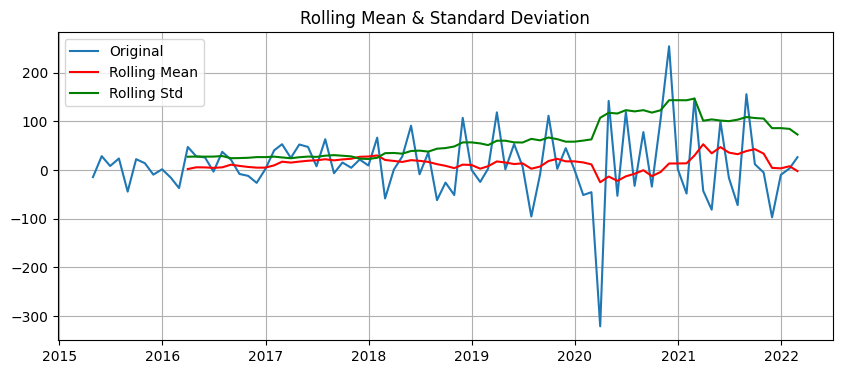

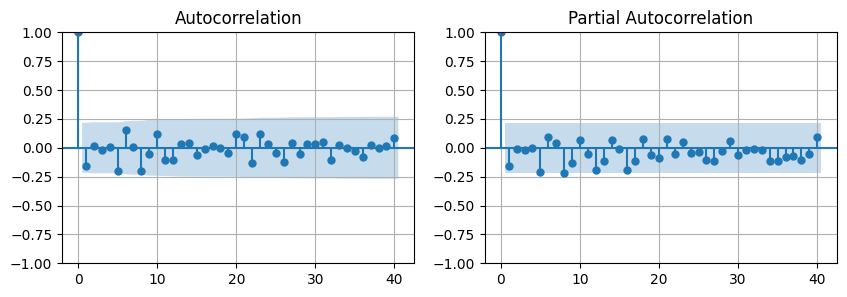

ADF Statistic: -5.86961067060013
p-value: 3.263616638075753e-07
Critical Values:
   1%: -3.517113604831504
   5%: -2.8993754262546574
   10%: -2.5869547797501644


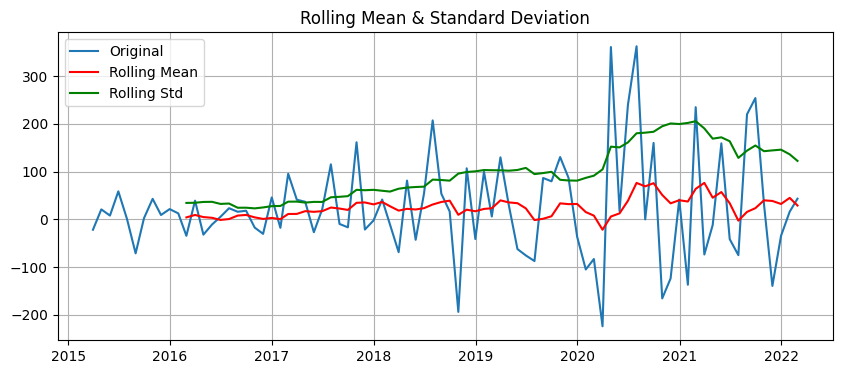

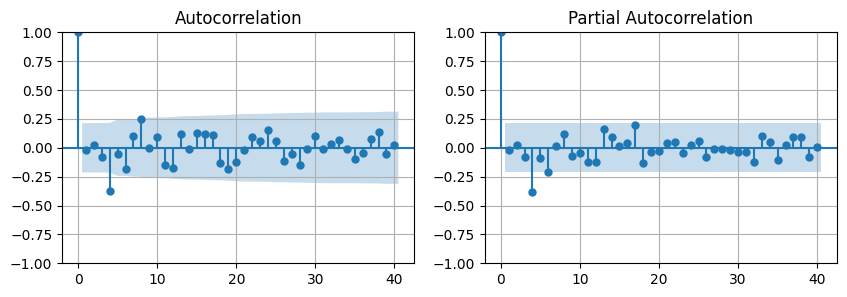

ADF Statistic: -10.185633676894092
p-value: 6.520064930413396e-18
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


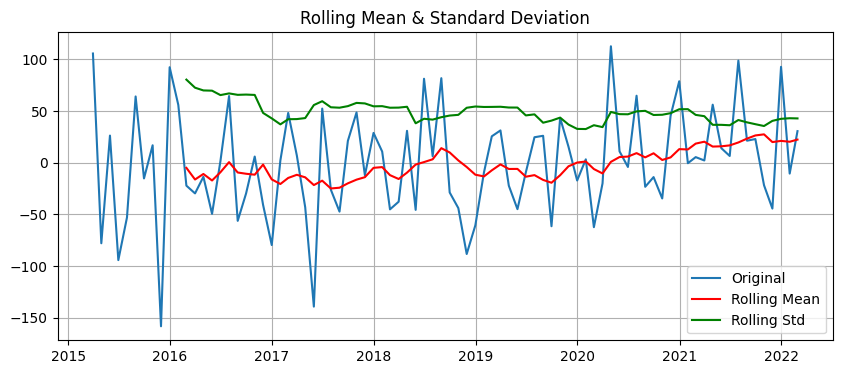

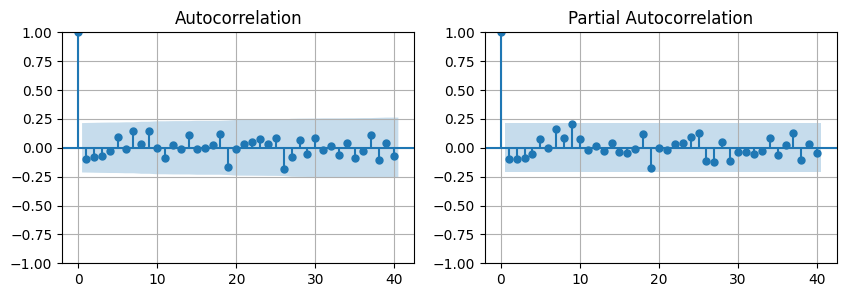

In [ ]:
# Assuming 'monthly_hdfc_data' is your time series DataFrame
test_stationarity(monthly_hdfc_data.first_difference)
test_stationarity(monthly_reliance_data.first_difference)
test_stationarity(monthly_sunpharma_data.first_difference)

In [ ]:
monthly_hdfc_data.index.min()

Timestamp('2015-03-31 00:00:00', freq='M')

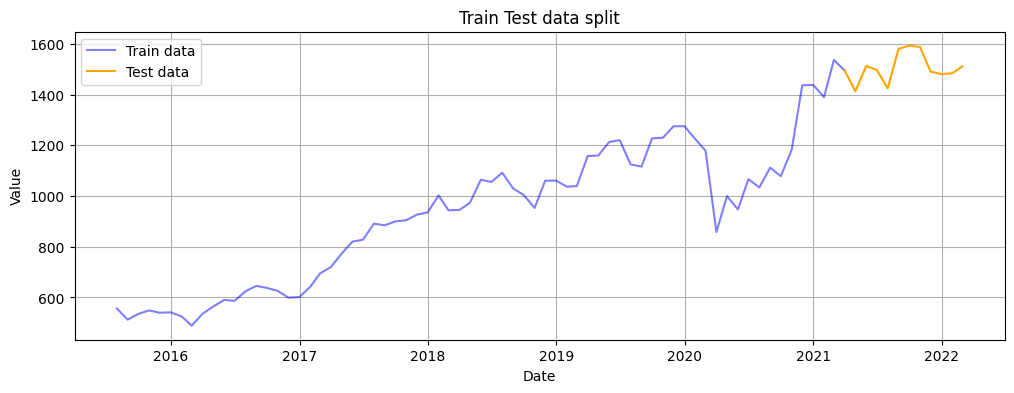

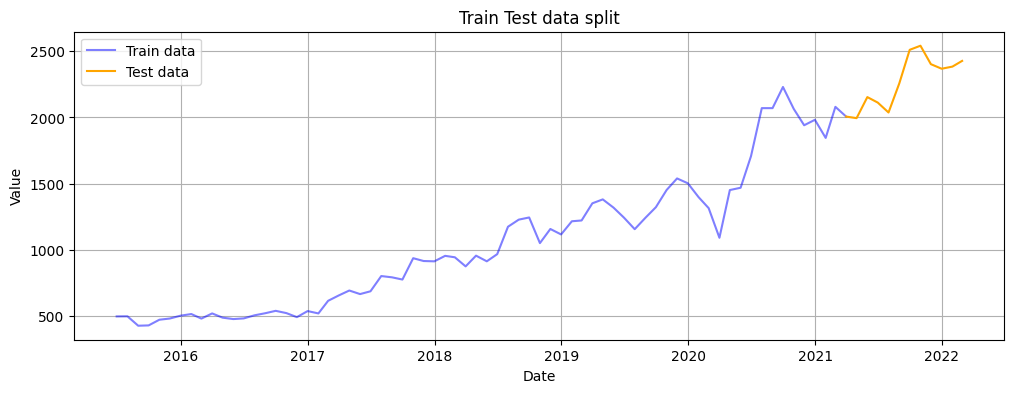

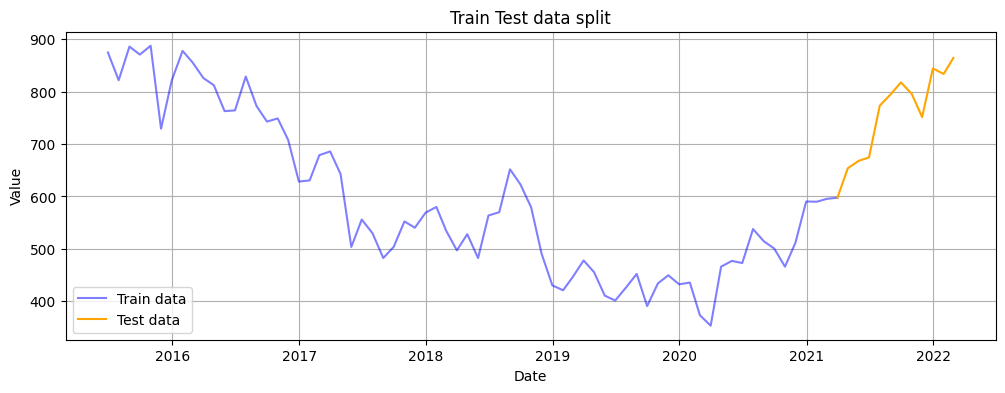

In [ ]:
#split data into train and training set
train_hdfc, test_hdfc = monthly_hdfc_data[3:-11], monthly_hdfc_data[-12:]
# Create a plot to visualize train and test data
plt.figure(figsize=(12, 4))
plt.plot(train_hdfc.index, train_hdfc['close'], label='Train data', color='blue', alpha=0.5)
plt.plot(test_hdfc.index, test_hdfc['close'], label='Test data', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Test data split')
plt.legend()
plt.grid(True)
plt.show()

#split data into train and training set
train_rel, test_rel = monthly_reliance_data[3:-11], monthly_reliance_data[-12:]
# Create a plot to visualize train and test data
plt.figure(figsize=(12, 4))
plt.plot(train_rel.index, train_rel['close'], label='Train data', color='blue', alpha=0.5)
plt.plot(test_rel.index, test_rel['close'], label='Test data', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Test data split')
plt.legend()
plt.grid(True)
plt.show()

#split data into train and training set
train_sun, test_sun = monthly_sunpharma_data[3:-11], monthly_sunpharma_data[-12:]
# Create a plot to visualize train and test data
plt.figure(figsize=(12, 4))
plt.plot(train_sun.index, train_sun['close'], label='Train data', color='blue', alpha=0.5)
plt.plot(test_sun.index, test_sun['close'], label='Test data', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Test data split')
plt.legend()
plt.grid(True)
plt.show()